In [1]:
# 1. Download the datasets - Boston House pricing, Titanic survivors
# Do we do imputation? - No we skip for this excercise

# https://seaborn.pydata.org/tutorial/axis_grids.html

# 1. Are we doing classification  or regression trees?
#    Use Gini, Entropy gain, Information gain
#    Pruning

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef
from itertools import combinations
from ucimlrepo import fetch_ucirepo 

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [33]:


def calc_matthews_corrcoef(X):
    """
    Calculate the pair wise matthews corr coeff for all the columns.

    returns a matrix 
    """
    corr_coeff = pd.DataFrame(np.nan, columns=X.columns, index=X.columns)
    
    pairs = list(combinations(X.columns, 2))

    for col in X.columns:
        corr_coeff.loc[col, col] = 1.0

    for col_x, col_y in combinations(X.columns, 2):

        corr_coeff.loc[col_x, col_y] = corr_coeff.loc[col_y, col_x] = matthews_corrcoef(X[col_x], X[col_y])

    return corr_coeff

In [34]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 

# Easy to understand data - => easier to sense check the result of the models
# Has a large data set
# Has mix of binary and integer data
# No missing data points
# The other dataset is coategorical dataset - has missing data
# Classification ouitcome is also binary

# Use phi coefficeint to find correlated data


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [35]:
idx = cdc_diabetes_health_indicators['variables']['type'] == 'Integer'
int_cols = cdc_diabetes_health_indicators['variables'].loc[idx, 'name']
int_cols = int_cols.loc[~int_cols.isin(y.columns.tolist() + ['ID'])]

In [36]:
int_cols

5           BMI
15      GenHlth
16     MentHlth
17     PhysHlth
20          Age
21    Education
22       Income
Name: name, dtype: object

<Axes: >

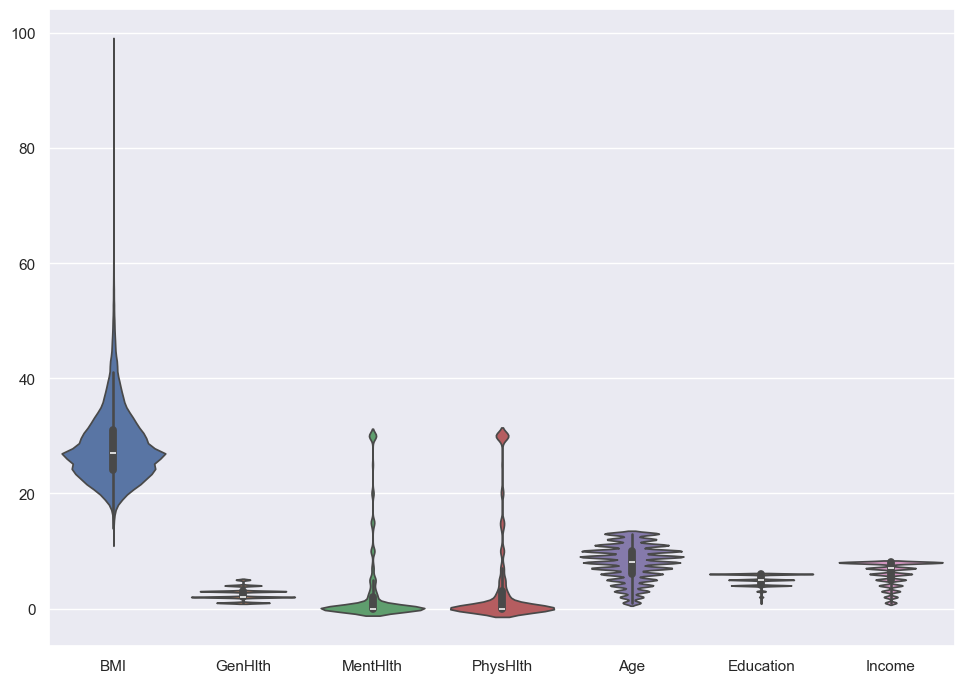

In [37]:
sns.violinplot(X[int_cols])

<Axes: >

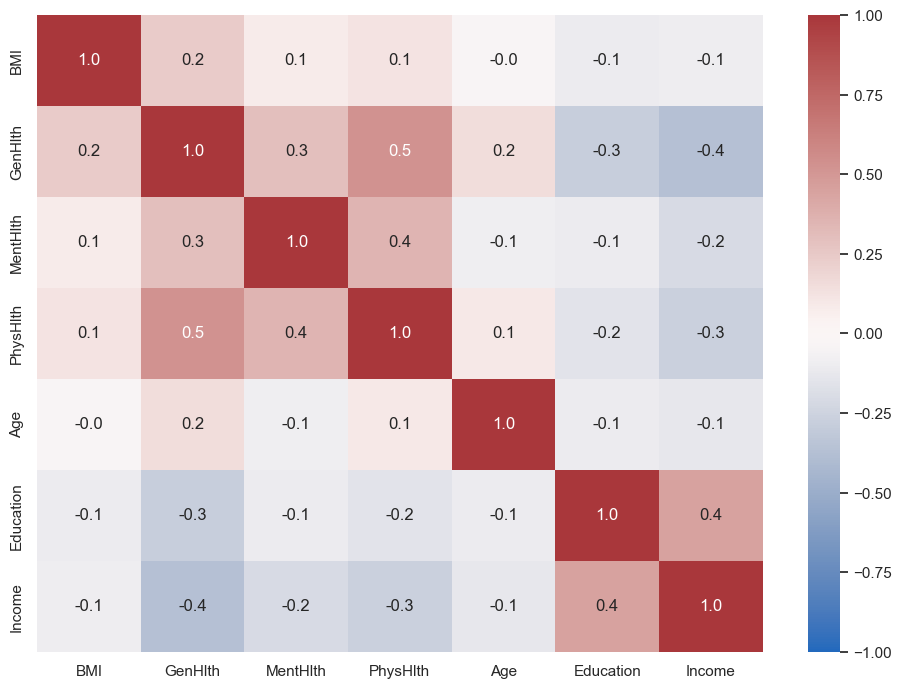

In [38]:
sns.heatmap(X[int_cols].corr(),annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')

<Axes: >

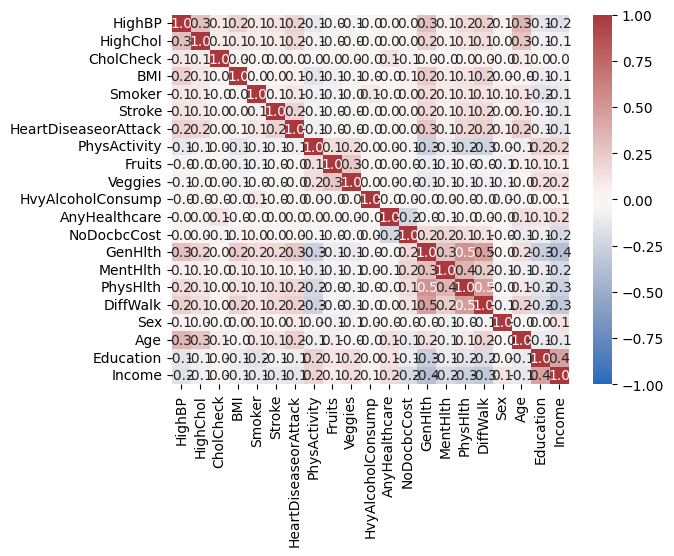

In [9]:
sns.heatmap(X.corr(),annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')

In [10]:
idx = cdc_diabetes_health_indicators['variables']['type'] == 'Binary'
bin_cols = cdc_diabetes_health_indicators['variables'].loc[idx, 'name']

# bin_cols.drop(y.names)
bin_cols = bin_cols.loc[~bin_cols.isin(y.columns)]


<Axes: >

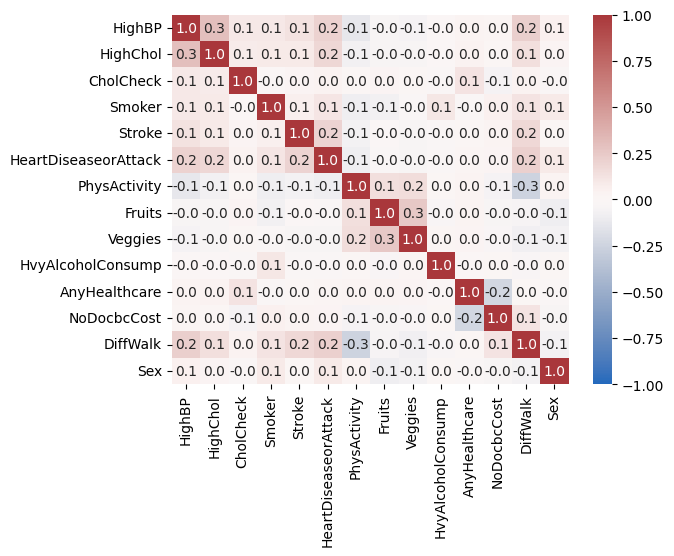

In [11]:
matt_corr_coeff = calc_matthews_corrcoef(X[bin_cols])
sns.heatmap(matt_corr_coeff, annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')

<Axes: >

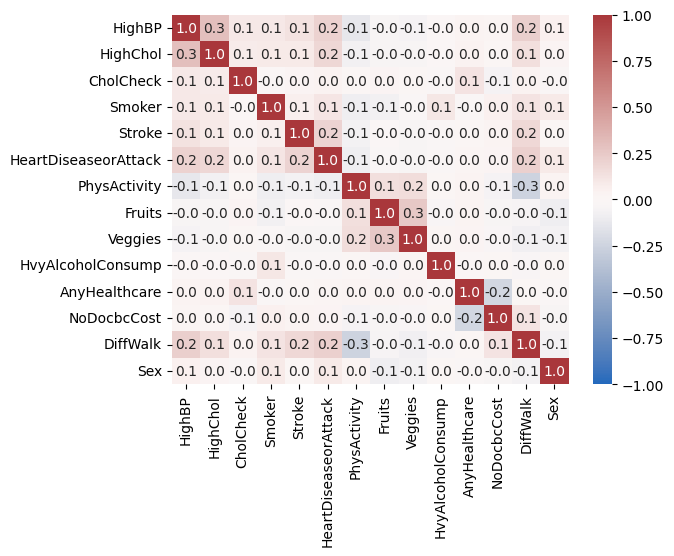

In [12]:
corr_coeff = X[bin_cols].corr()
sns.heatmap(corr_coeff, annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')

# EDA - on the training data set
1. For the binary value to a % plot of distribution - note the ones that are very skewed
2. For the continuous data - do a violin plot distribution  - do we need normalisation here?
3. Do a correlation plot o

In [13]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [14]:
X_melt = X.melt(id_vars=['Age', 'Sex'], 
                value_vars=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack'],  
                var_name='metric')

In [15]:
X_melt.head()

,Age,Sex,metric,value
0,9,0,HighBP,1
1,7,0,HighBP,0
2,9,0,HighBP,1
3,11,0,HighBP,1
4,11,0,HighBP,1


matplotlib.axes._axes.Axes

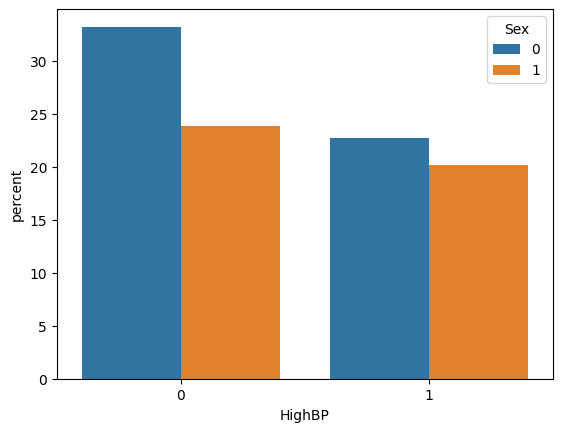

In [22]:
ax = sns.countplot(data=X, x='HighBP', hue='Sex', stat='percent')
type(ax)

In [ ]:
sns.countplot(data=X, x='HighChol', hue='Sex', stat='percent')

In [ ]:
sns.countplot(data=X, x='CholCheck', hue='Sex', stat='percent')

In [ ]:
sns.countplot(data=X, x='Smoker', hue='Sex', stat='percent')

In [ ]:
sns.countplot(data=X, x='Stroke', hue='Sex', stat='percent')

In [ ]:
sns.countplot(data=X, x='Stroke', hue='HeartDiseaseorAttack', stat='percent')

In [ ]:
sns.countplot(data=X, x='Stroke', hue='PhysActivity', stat='percent')

In [ ]:
sns.countplot(data=X, x='Stroke', hue='Fruits', stat='percent')

In [ ]:
sns.countplot(data=X, x='Stroke', hue='Veggies', stat='percent')

In [ ]:
# sns.countplot(X, x='HighBP')
cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
        'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
g= sns.FacetGrid(X[cols],  row='HighBP', hue='Sex')
g.map(sns.countplot, 'Age')
# sns.countplot(X, x='Fruits', hue='Sex', )

In [ ]:
sns.FacetGrid(X, )

In [ ]:
# relplot
# g = sns.PairGrid(X)
# g.map_diag(sns.scatterplot)
# g.map_upper
# g.map_offdiag(sns.scatterplot)


g = sns.PairGrid(X[['HighBP', 'HighChol', 'Sex']], )
g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)


#### # variable information 
cdc_diabetes_health_indicators.variables

In [ ]:
X